In [48]:
import os
import pandas as pd

# Load the dataset and display first few rows
df=pd.read_csv("data/fifa21 raw data v2.csv")
df.head()

/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_38216/1942310035.py:5: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("data/fifa21 raw data v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [49]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])


Missing values per column:
 Loan Date End    17966
Hits              2595
dtype: int64


In [50]:
# Check for duplicates and remove if any exist
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if they exist
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicates removed. Remaining duplicates: {df.duplicated().sum()}")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


In [51]:
# Convert Height to inches 
def convert_height(height):
    if isinstance(height, str):
        if "'" in height:
            feet, inches = height.split("'")
            return int(feet) * 12 + int(inches.replace('"', '').strip())
        elif "cm" in height:
            return int(height.replace('cm', '').strip()) * 0.393701
    return None

# Convert Weight to numerical (in lbs)
def convert_weight(weight):
    if isinstance(weight, str):
        if "lbs" in weight:
            return int(weight.replace('lbs', '').strip())
        elif "kg" in weight:
            return int(weight.replace('kg', '').strip()) * 2.20462
    return None

# Apply the functions to clean the 'Height' and 'Weight' columns
df['Height'] = df['Height'].apply(convert_height)
df['Weight'] = df['Weight'].apply(convert_weight)

# Display the cleaned data for Height and Weight columns
df[['Height', 'Weight']].head()


,Height,Weight
0,66.929170,158.73264
1,73.622087,182.98346
2,74.015788,191.80194
3,71.259881,154.32340
4,68.897675,149.91416


In [52]:
# Remove newline characters from all string columns
df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

# Verify the removal of newline characters
df.head()


/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_38216/2527334713.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [53]:
# Helper function to convert money strings to numeric values
def convert_money(value):
    if isinstance(value, str):
        # Remove the currency symbol and convert abbreviations
        value = value.replace('€', '').replace('M', '000000').replace('K', '000')
        try:
            return float(value)
        except ValueError:
            return None  # In case of non-convertible strings
    return value

# Apply conversion function to 'Value', 'Wage', and 'Release Clause' columns
df['Value'] = df['Value'].apply(convert_money)
df['Wage'] = df['Wage'].apply(convert_money)
df['Release Clause'] = df['Release Clause'].apply(convert_money)

# Display cleaned monetary columns to verify
df[['Value', 'Wage', 'Release Clause']].head()


,Value,Wage,Release Clause
0,103.5,560000.0,138.4
1,63000000.0,220000.0,75.9
2,120000000.0,125000.0,159.4
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166.5


In [54]:
# Convert star-rated columns to numeric (replace '★' with empty string and convert to float)
star_columns = ['W/F', 'SM', 'IR']
for col in star_columns:
    df[col] = df[col].replace({'★': ''}, regex=True).astype(float)

# Display the cleaned star-rating columns
df[star_columns].head()


,W/F,SM,IR
0,4.0,4.0,5.0
1,4.0,5.0,5.0
2,3.0,1.0,3.0
3,5.0,4.0,4.0
4,5.0,5.0,5.0


In [55]:
from datetime import datetime

# Convert 'Joined' to datetime format
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')

# Calculate tenure in years
current_year = datetime.now().year
df['Years_at_Club'] = current_year - df['Joined'].dt.year

# Filter players with over 10 years at their current club
long_tenure_players = df[df['Years_at_Club'] > 10]

# Display players with more than 10 years at their club
long_tenure_players[['Name', 'Club', 'Joined', 'Years_at_Club']].head()


,Name,Club,Joined,Years_at_Club
0,L. Messi,FC Barcelona,2004-07-01,20
12,Casemiro,Real Madrid,2013-07-11,11
14,M. Neuer,FC Bayern München,2011-07-01,13
15,K. Benzema,Real Madrid,2009-07-09,15
16,Sergio Ramos,Real Madrid,2005-08-01,19


In [56]:
# Calculate the value-to-wage ratio
df['Value_to_Wage_Ratio'] = df['Value'] / df['Wage']

# Filter players who have high value but low wage (for example, value > 1 million and wage < 5,000)
high_value_low_wage = df[(df['Value'] > 1000000) & (df['Wage'] < 5000)]

# Display these players
high_value_low_wage[['Name', 'Club', 'Value', 'Wage', 'Value_to_Wage_Ratio']].head()


,Name,Club,Value,Wage,Value_to_Wage_Ratio
346,Ismaily,Shakhtar Donetsk,22000000.0,1000.0,22000.0
373,V. Tsygankov,Dynamo Kyiv,34000000.0,1000.0,34000.0
507,Júnior Moraes,Shakhtar Donetsk,11000000.0,1000.0,11000.0
588,José Sá,Olympiacos CFP,16000000.0,1000.0,16000.0
670,M. Valbuena,Olympiacos CFP,7000000.0,1000.0,7000.0


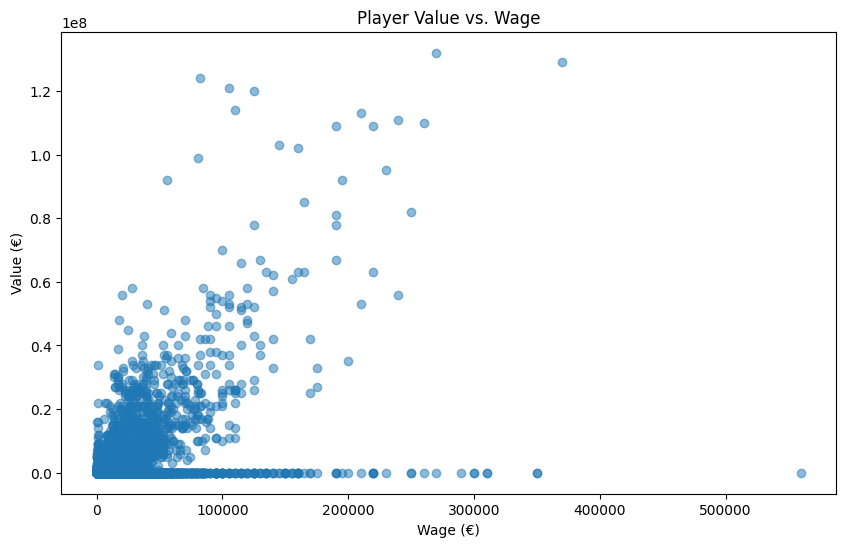

In [57]:
import matplotlib.pyplot as plt

# Scatter plot between Wage and Value
plt.figure(figsize=(10, 6))
plt.scatter(df['Wage'], df['Value'], alpha=0.5)
plt.xlabel('Wage (€)')
plt.ylabel('Value (€)')
plt.title('Player Value vs. Wage')
plt.show()


/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_38216/3847409982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


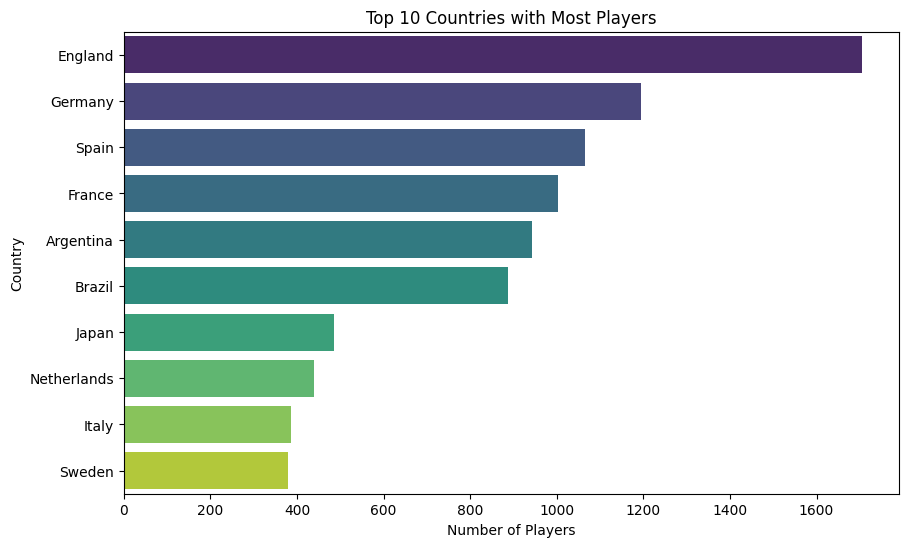

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count players by country and get the top 10
top_countries = df['Nationality'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Players')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()


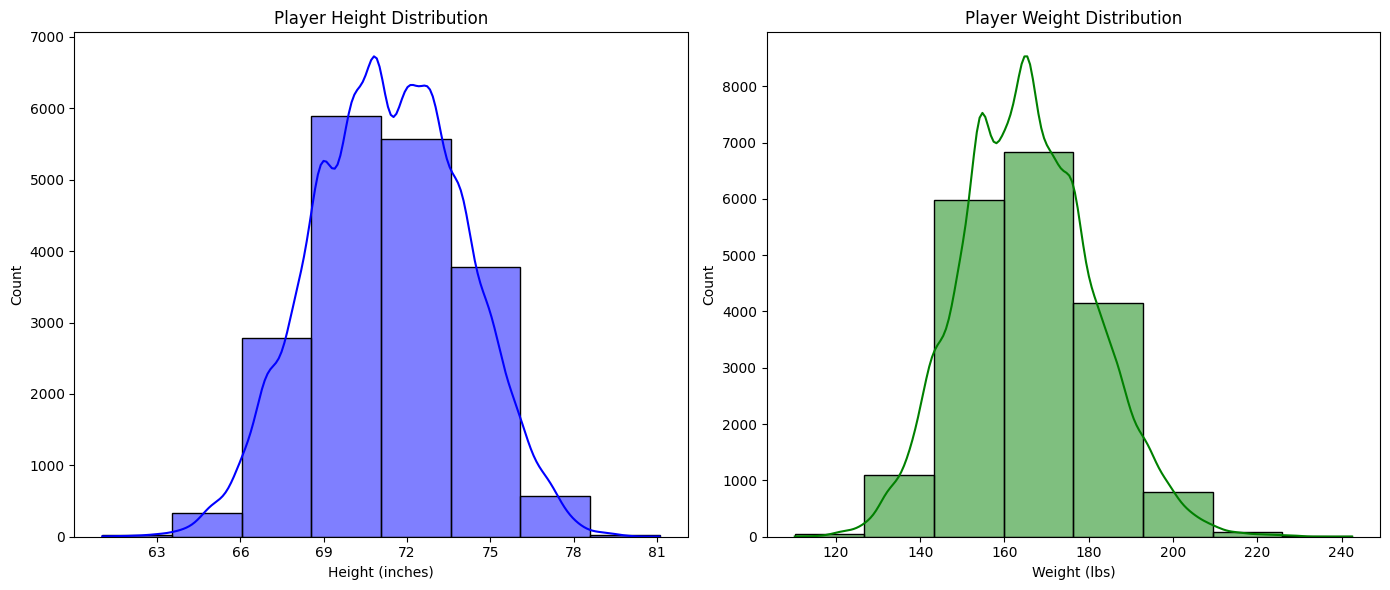

In [59]:
# Plot histograms for height and weight distributions with simplified x-axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Height distribution with wider bins and selected x-ticks
sns.histplot(df['Height'], bins=8, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Player Height Distribution')
axes[0].set_xlabel('Height (inches)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(8))

# Weight distribution with wider bins and selected x-ticks
sns.histplot(df['Weight'], bins=8, kde=True, ax=axes[1], color='green')
axes[1].set_title('Player Weight Distribution')
axes[1].set_xlabel('Weight (lbs)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(8))

plt.tight_layout()
plt.show()


In [60]:
# Check column names in the dataset
print(df.columns)


Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_38216/3697789598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='viridis')


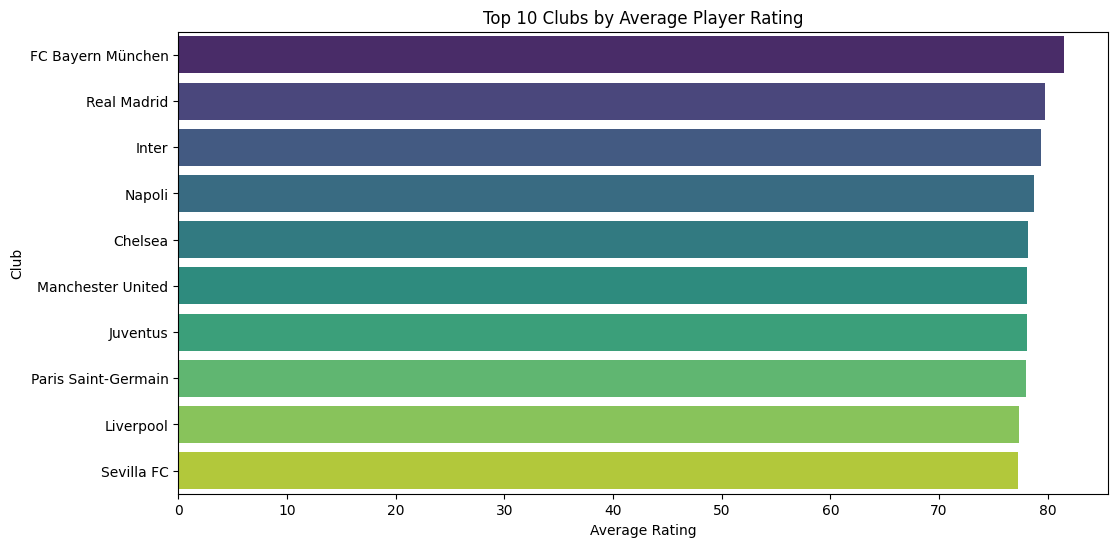

In [61]:
# Calculate the top 10 clubs by average overall rating
top_clubs = df.groupby('Club')['↓OVA'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='viridis')
plt.title('Top 10 Clubs by Average Player Rating')
plt.xlabel('Average Rating')
plt.ylabel('Club')
plt.show()


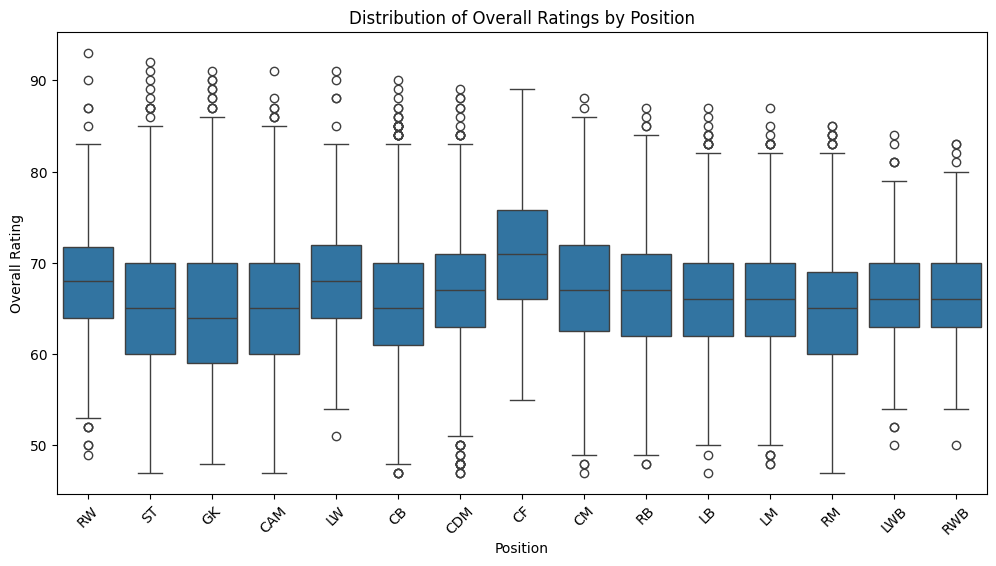

In [62]:
# Box plot of overall ratings by position
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Best Position', y='↓OVA')  # '↓OVA' assumed to be Overall Rating
plt.title('Distribution of Overall Ratings by Position')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show()


In [63]:
# Display all column names to see which ones are available
print(df.columns)


Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

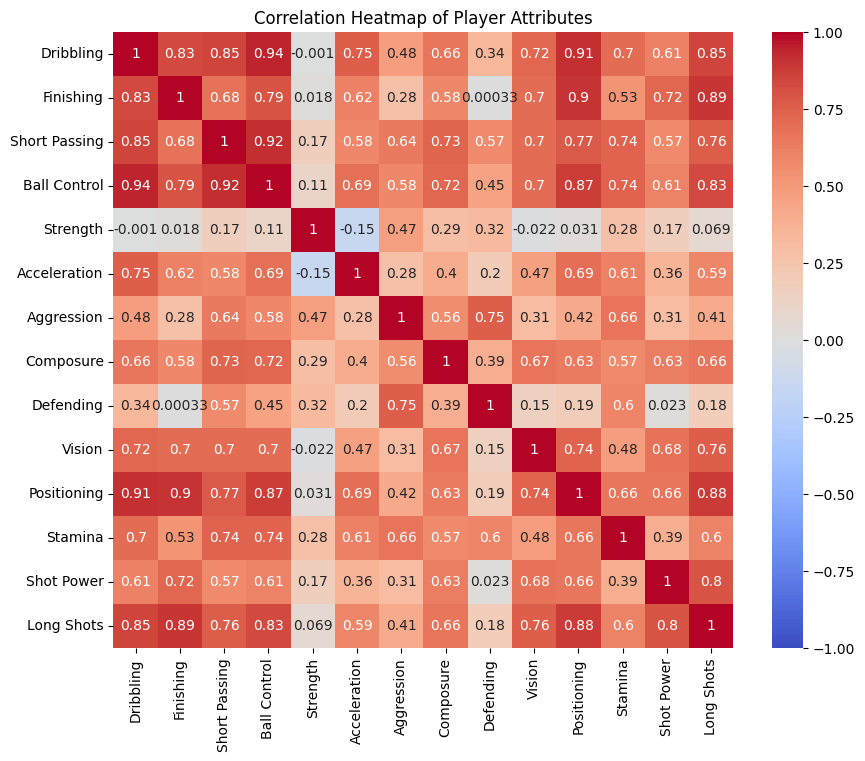

In [64]:
# Updated list of attributes based on the columns in your dataset
attributes = [
    'Dribbling', 'Finishing', 'Short Passing', 'Ball Control', 'Strength', 
    'Acceleration', 'Aggression', 'Composure', 'Defending', 'Vision', 
    'Positioning', 'Stamina', 'Shot Power', 'Long Shots'
]

# Filter the dataset to include only the attributes that exist and calculate correlations
existing_attributes = [attr for attr in attributes if attr in df.columns]
correlation_matrix = df[existing_attributes].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Player Attributes')
plt.show()
